In [1]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [32]:
df=pd.read_csv("./join_complete.csv", index_col=0)

In [33]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 한 번 살펴볼게요.
df.head(3)

,date,subjectivity,polarity,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,0.243801,0.084413,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,0.257014,0.097354,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,0.326438,0.144448,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143


In [34]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

In [35]:
### 데이터 셋 구조 보기
df.shape 

(92, 10)

In [36]:
### 결측치 : 비어있는 데이터를 찾습니다. 
### 여기서는 어떤 컬럼(변수, 특성, x)에 결측치가 많은지 봅니다.
df.isnull().sum()

date            0
subjectivity    0
polarity        0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

In [37]:
### data type을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          92 non-null     object 
 1   subjectivity  92 non-null     float64
 2   polarity      92 non-null     float64
 3   Date          92 non-null     object 
 4   Open          92 non-null     float64
 5   High          92 non-null     float64
 6   Low           92 non-null     float64
 7   Close         92 non-null     float64
 8   Adj Close     92 non-null     float64
 9   Volume        92 non-null     int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB


In [38]:
### 슷지형 변수만 뽑아서 기본 통계를 해 봅니다.

df.describe()

,subjectivity,polarity,Open,High,Low,Close,Adj Close,Volume
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,0.321563,0.133929,47159.392196,48443.249023,45701.748726,47249.746264,47249.746264,4.602204e+10
std,0.043734,0.035971,10717.035922,10691.054809,10475.109649,10492.647347,10492.647347,1.929738e+10
min,0.219152,0.072422,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.878799e+10
25%,0.293310,0.096733,38194.595703,39737.722656,36639.428711,38428.282227,38428.282227,3.266150e+10
50%,0.333731,0.140163,46871.541016,48000.910156,45639.955078,46829.898438,46829.898438,4.025103e+10
75%,0.351317,0.162922,57912.541016,58436.839844,55433.492188,57450.347656,57450.347656,5.635202e+10
max,0.432971,0.205167,66002.234375,66930.390625,64180.488281,65992.835938,65992.835938,1.014672e+11


## 2-2 종속변수(타겟변수, y)의 탐색

In [39]:
### 기초 통계량을 다시 살펴봅니다.

df['Adj Close'].describe()

count       92.000000
mean     47249.746264
std      10492.647347
min      29807.347656
25%      38428.282227
50%      46829.898438
75%      57450.347656
max      65992.835938
Name: Adj Close, dtype: float64

<AxesSubplot:>

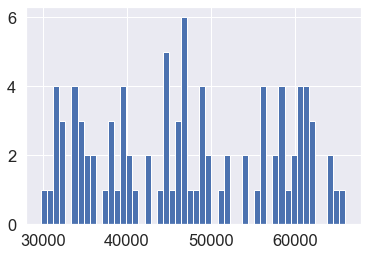

In [40]:
### 시각화를 해서 살펴봅니다. 데이터의 분포를 파악할때, 시각화각 가장 좋은 방법 중 한개 입니다.!! 
### .hist(): 히스토그램을 의미합니다. bins=50:주머니가 50개 이다. x가 50개로 나누어 진다라고 이해하셔도 좋습니다. 
### y축은 frequency 빈도수입니다. x 축은 실제 갑습니다. 
df['Adj Close'].hist(bins=50)

## 2-3 설명변수(독립변수, features, attributes, x) 살펴보기

<ipython-input-42-c6c955b2cb0d>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numerical_columns].hist(ax=ax)


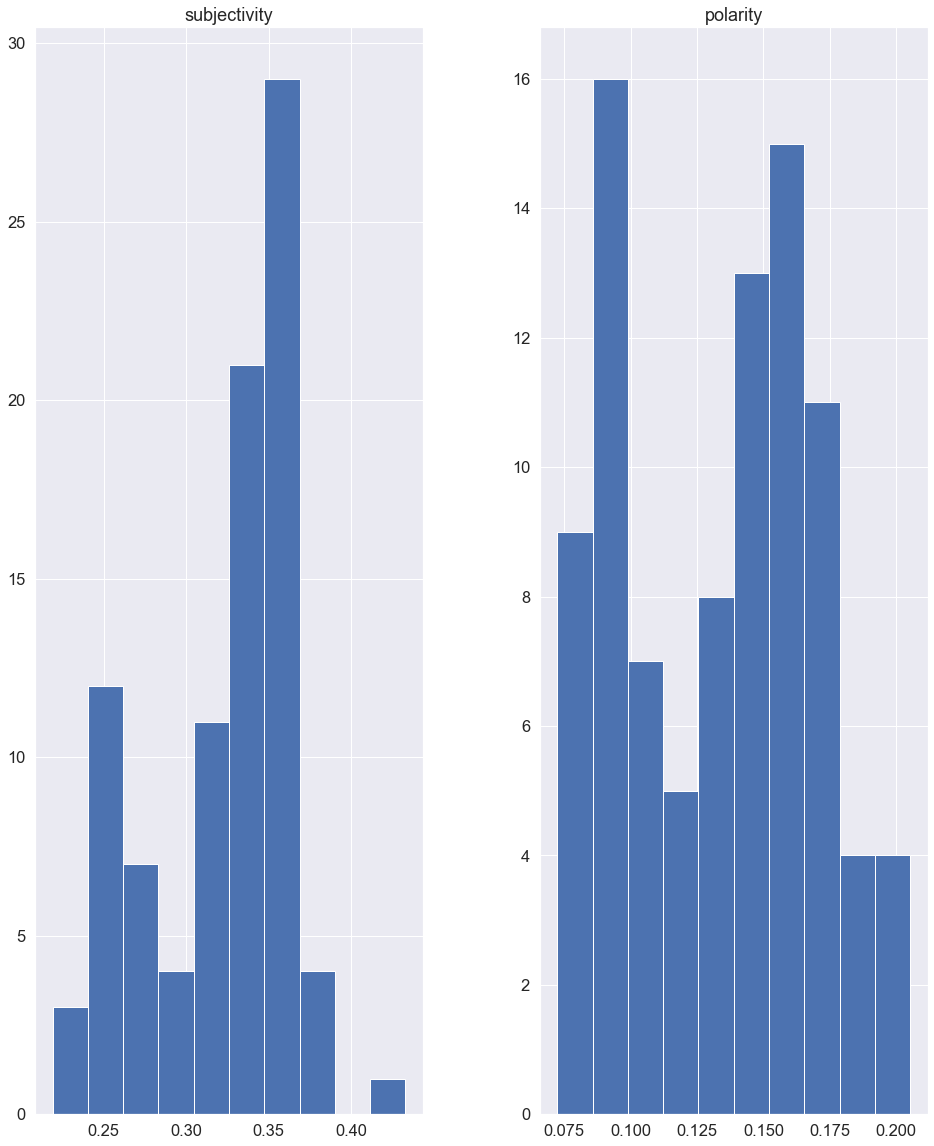

In [42]:
numerical_columns=['subjectivity', 'polarity']

### figsize()는 plot()의 기본 크기를 지정합니다. 
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca(), gcf(), axis()
### gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다.
### ax=plt.gica(): 축의 위치를 호출하여 ax로 설정(축 위치 변경을 위해 필요한 과정)

df[numerical_columns].hist(ax=ax)
plt.show()

## 2-4. 설명변수(x) 와 종속변수(y) 간의 관계 탐색
변수간의 상관관계 파악해 봅니다.

In [43]:
### Person 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation), -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118

cols = ['Adj Close', 'subjectivity', 'polarity']

corr = df[cols].corr(method = 'pearson')
corr

,Adj Close,subjectivity,polarity
Adj Close,1.000000,-0.288870,-0.185635
subjectivity,-0.288870,1.000000,0.871112
polarity,-0.185635,0.871112,1.000000


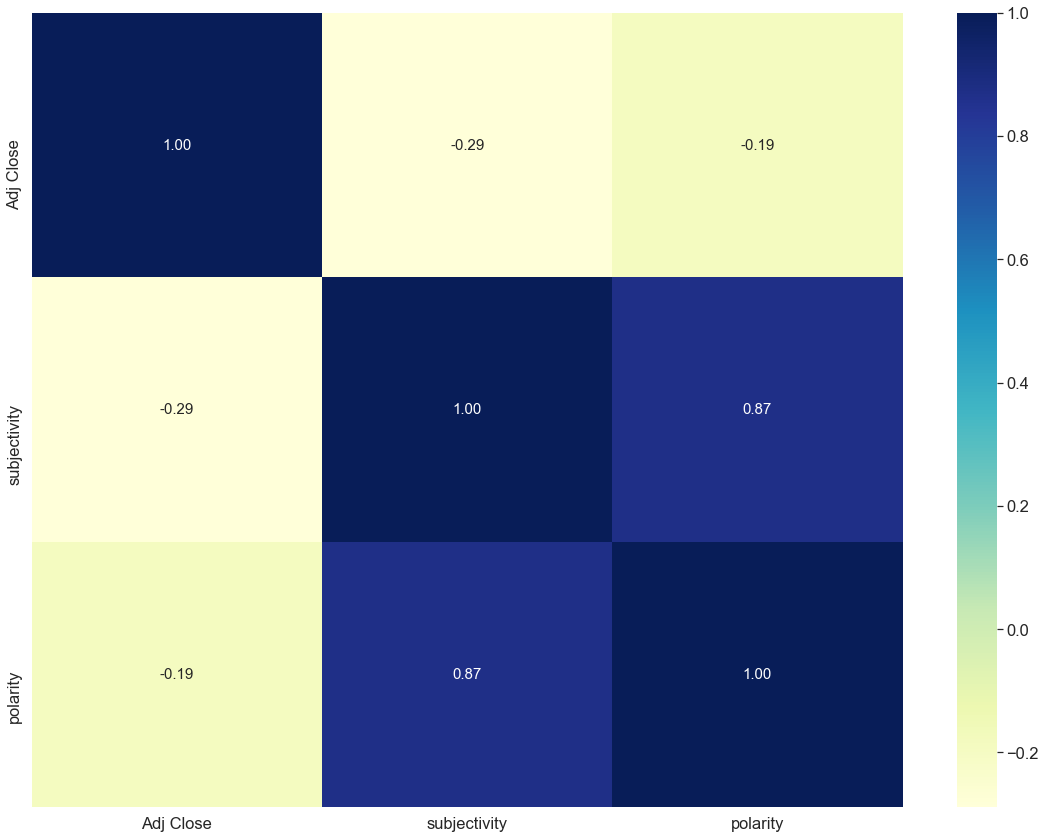

In [44]:
### 상관관계를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.
### heatmap (seaborn): 여기서는 seaborn 시각화 라이브러리를 사용해서 표현합니다. 
### 시각화의 대표적인 라이브러리가 matplot(https://matplotlib.org/)과 seaborn(https://seaborn.pydata.org/)이 있습니다.

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정 
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "YlGnBu")
plt.tight_layout()
plt.show()

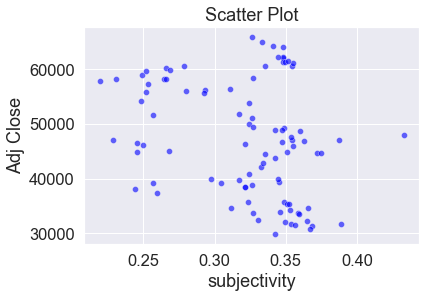

In [45]:
### scatter plot 산점도, https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x='subjectivity', y='Adj Close', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

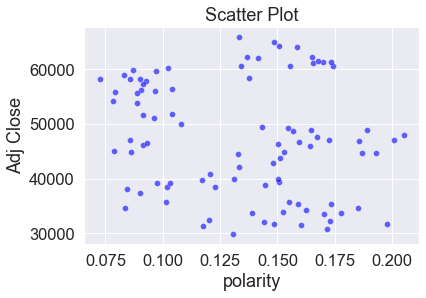

In [46]:

# scatter plot
sns.scatterplot(data=df, x='polarity', y='Adj Close', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()